<a href="https://colab.research.google.com/github/abdulsamadkhan/MachineLearningTutorials/blob/main/classificationDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, random_state=42)

# Feature names (dummy names since dataset is synthetic)
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
print('Features in the dataset:', feature_names)

Features in the dataset: ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7']


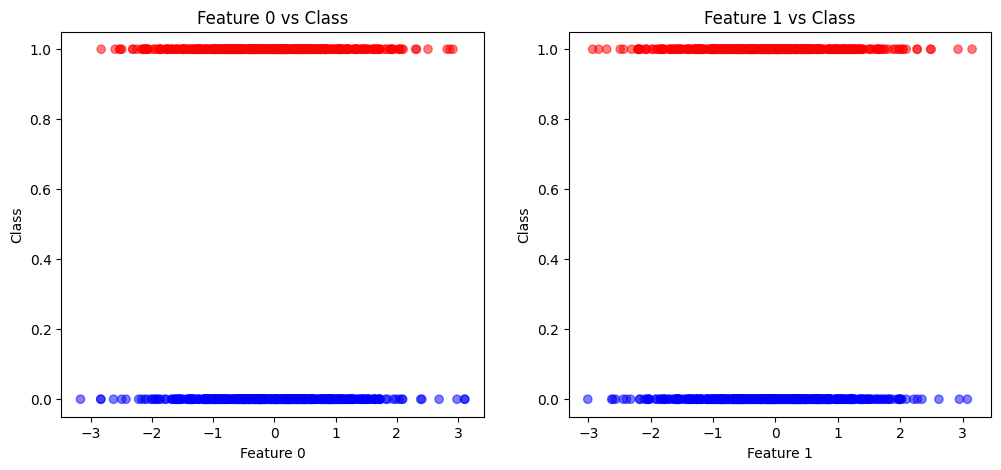

In [3]:
# Visualize the first two features against the target
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y, alpha=0.5, c=y, cmap='bwr')
plt.xlabel('Feature 0')
plt.ylabel('Class')
plt.title('Feature 0 vs Class')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, alpha=0.5, c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Class')
plt.title('Feature 1 vs Class')
plt.show()

In [4]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [6]:
# Define a simple neural network for classification
class ClassificationNetwork(nn.Module):
    def __init__(self):
        super(ClassificationNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

model = ClassificationNetwork()

In [7]:
# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [8]:
# Training loop
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        val_losses.append(val_loss.item())

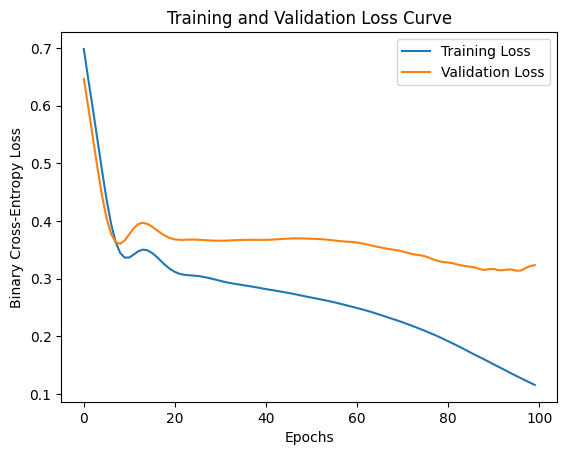

In [9]:
# Plot training and validation loss
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend()
plt.title('Training and Validation Loss Curve')
plt.show()

In [10]:
model = nn.Sequential(
    nn.Linear(8, 64),  # Input layer (8 features) to first hidden layer (64 neurons)
    nn.ReLU(),  # Activation function
    nn.Linear(64, 32),  # Second hidden layer
    nn.ReLU(),  # Activation function
    nn.Linear(32, 1),  # Output layer (1 neuron for binary classification)
    nn.Sigmoid()  # Sigmoid activation to output probability
)



In [11]:
model

Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
  (5): Sigmoid()
)

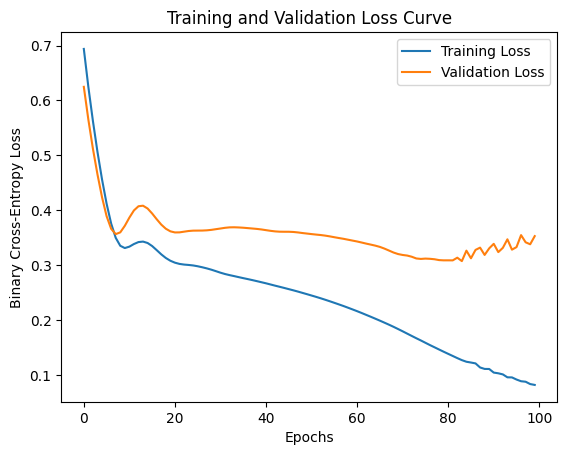

In [12]:
# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        val_losses.append(val_loss.item())

# Plot training and validation loss
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.legend()
plt.title("Training and Validation Loss Curve")
plt.show()
